# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#!pip3 install citipy --user # forma de instalarlo

In [ ]:
#source ~/.bash_profile #activa archivo

In [ ]:
#source activate PyEnv # Activar el ambiente

In [ ]:
#jupyter notebook # Abrir Jupiter

In [ ]:
# cd /Users/TUNOMBREDEUSAURIO/opt/anaconda3/envs/PyEnv/bin # desde ahi pip3 install gmaps

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random 
import seaborn as sns; sns.set(color_codes=True)

# Import API key
from api_keys import api_key_OW



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "metric"
query_url = f"{url}appid={api_key_OW}&units={unit}&q="
query_url



'http://api.openweathermap.org/data/2.5/weather?appid=434afb0302acb5e7608dfeeed1a45c52&units=metric&q='

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
cities

['mataura',
 'sao miguel do araguaia',
 'yellowknife',
 'taolanaro',
 'soe',
 'loucovice',
 'puerto ayora',
 'fortuna',
 'awbari',
 'tahta',
 'port-gentil',
 'vaini',
 'hermanus',
 'aldergrove',
 'busselton',
 'punta arenas',
 'kapaa',
 'barentsburg',
 'ambilobe',
 'jamestown',
 'mega',
 'albany',
 'hobart',
 'ushuaia',
 'saint-philippe',
 'provideniya',
 'asfi',
 'tomatlan',
 'esperance',
 'klaksvik',
 'rikitea',
 'butaritari',
 'samalaeulu',
 'roma',
 'atuona',
 'denpasar',
 'cape town',
 'narsaq',
 'saint anthony',
 'ribeira grande',
 'grand river south east',
 'nuuk',
 'lata',
 'darhan',
 'point fortin',
 'hilo',
 'walvis bay',
 'natal',
 'saint george',
 'brookings',
 'caucaia',
 'hithadhoo',
 'buraydah',
 'chokurdakh',
 'marivan',
 'kutum',
 'kaoma',
 'east london',
 'bonavista',
 'akdepe',
 'bethel',
 'abha',
 'trebinje',
 'rhyl',
 'dehloran',
 'georgetown',
 'khatanga',
 'grindavik',
 'ales',
 'kahului',
 'palabuhanratu',
 'touros',
 'bredasdorp',
 'dikson',
 'port elizabeth',


In [4]:
#For simple test of the code
rand_cities = [cities[2],cities[3],cities[4],cities[5],cities[6],cities[7],cities[8],cities[9],cities[10],cities[11]]
random_num = cities[10]
rand_cities

['yellowknife',
 'taolanaro',
 'soe',
 'loucovice',
 'puerto ayora',
 'fortuna',
 'awbari',
 'tahta',
 'port-gentil',
 'vaini']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Data Frame

Cities_DF = pd.DataFrame({'Cities': cities})
Cities_DF['Temperature (C)'] = ''
Cities_DF['Humidity (%)'] = ''
Cities_DF['Cloudiness (%)'] = ''
Cities_DF['Wind Speed (mph)'] = ''
Cities_DF['Country'] = ''
Cities_DF['Latitude'] = ''
Cities_DF['Longitude'] = ''
Cities_DF = Cities_DF.drop_duplicates(subset=['Cities'],keep='first')
Cities_DF

,Cities,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Latitude,Longitude
0,mataura,,,,,,,
1,sao miguel do araguaia,,,,,,,
2,yellowknife,,,,,,,
3,taolanaro,,,,,,,
4,soe,,,,,,,
...,...,...,...,...,...,...,...,...
605,george town,,,,,,,
606,freeport,,,,,,,
607,prachuap khiri khan,,,,,,,
608,mpika,,,,,,,


In [6]:
# For Loop #index,row
r=0
for index,row in Cities_DF.iterrows():
    city = row['Cities']
    r = r + 1
    
    try:
        query_url2 = query_url+city
        response = requests.get(query_url+city).json()
       #  df.at[df.index[i], 'Probability{}'.format(p)] = float(probability)
        Cities_DF.at[r,'Temperature (C)']= float(response["main"]["temp"])
        Cities_DF.at[r,'Humidity (%)'] = (response["main"]["humidity"])
        Cities_DF.at[r,'Cloudiness (%)'] = (response["clouds"]["all"])
        Cities_DF.at[r,'Wind Speed (mph)']= (response["wind"]["speed"])
        Cities_DF.at[r,'Country']= (response["sys"]["country"])
        Cities_DF.at[r,'Latitude']= float(response["coord"]["lat"])
        Cities_DF.at[r,'Longitude']= float(response["coord"]["lon"])
        
        print(f"Processing: {city}")
    
    except:
        
        print(f"City not found: {city}")

Processing: mataura
Processing: sao miguel do araguaia
Processing: yellowknife
City not found: taolanaro
Processing: soe
Processing: loucovice
Processing: puerto ayora
Processing: fortuna
Processing: awbari
Processing: tahta
Processing: port-gentil
Processing: vaini
Processing: hermanus
Processing: aldergrove
Processing: busselton
Processing: punta arenas
Processing: kapaa
City not found: barentsburg
Processing: ambilobe
Processing: jamestown
Processing: mega
Processing: albany
Processing: hobart
Processing: ushuaia
Processing: saint-philippe
Processing: provideniya
Processing: asfi
Processing: tomatlan
Processing: esperance
Processing: klaksvik
Processing: rikitea
Processing: butaritari
City not found: samalaeulu
Processing: roma
Processing: atuona
Processing: denpasar
Processing: cape town
Processing: narsaq
Processing: saint anthony
Processing: ribeira grande
City not found: grand river south east
Processing: nuuk
Processing: lata
Processing: darhan
Processing: point fortin
Processi

Processing: yerbogachen
Processing: inhambane
Processing: tual
Processing: mayor pablo lagerenza
Processing: mount gambier
Processing: nakamura
Processing: el fuerte
Processing: russell
Processing: myskhako
Processing: kandrian
Processing: galesong
Processing: cockburn town
City not found: santa eulalia del rio
Processing: hofn
Processing: san-pedro
Processing: berlevag
Processing: nara
City not found: tubruq
Processing: betare oya
Processing: viedma
Processing: tupik
City not found: coulihaut
Processing: green river
Processing: salym
Processing: yurty
City not found: play cu
Processing: cidreira
Processing: alekseyevka
Processing: llandrindod wells
Processing: wilmington
City not found: kuche
Processing: gbadolite
Processing: okmulgee
Processing: sampit
Processing: los llanos de aridane
Processing: amapa
City not found: saleaula
Processing: kisangani
Processing: vostok
Processing: bahia honda
Processing: sokoni
Processing: seybaplaya
Processing: del rio
Processing: waipawa
Processing:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
Cities_DF.to_csv('Cities_DF.csv',index=False)
Cities_DF

,Cities,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Latitude,Longitude
0,mataura,,,,,,,
1,sao miguel do araguaia,10.16,85,100,3.26,NZ,-46.19,168.86
2,yellowknife,27.81,72,45,3.49,BR,-13.28,-50.16
3,taolanaro,7.23,49,75,5.1,CA,62.46,-114.35
4,soe,,,,,,,
...,...,...,...,...,...,...,...,...
606,freeport,27.31,94,40,1.5,MY,5.41,100.34
607,prachuap khiri khan,16.89,25,20,4.6,US,40.66,-73.58
608,mpika,28.09,77,0,3.18,TH,11.82,99.78
609,garmisch-partenkirchen,15.18,80,19,2.09,ZM,-11.83,31.45


In [8]:
#Same list but dropping NAs
Cities_DF2 = Cities_DF[Cities_DF["Temperature (C)"] != '']
Cities_DF2.to_csv('Cities_DF2.csv',index=False)
Cities_DF2

,Cities,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Latitude,Longitude
1,sao miguel do araguaia,10.16,85,100,3.26,NZ,-46.19,168.86
2,yellowknife,27.81,72,45,3.49,BR,-13.28,-50.16
3,taolanaro,7.23,49,75,5.1,CA,62.46,-114.35
5,loucovice,18.43,100,25,2.53,ID,-9.86,124.28
6,puerto ayora,13.88,55,0,4.47,CZ,48.62,14.26
...,...,...,...,...,...,...,...,...
606,freeport,27.31,94,40,1.5,MY,5.41,100.34
607,prachuap khiri khan,16.89,25,20,4.6,US,40.66,-73.58
608,mpika,28.09,77,0,3.18,TH,11.82,99.78
609,garmisch-partenkirchen,15.18,80,19,2.09,ZM,-11.83,31.45


In [9]:
#Converting data into float
Cities_DF2['Temperature (C)'] = Cities_DF2['Temperature (C)'].astype(float)
Cities_DF2['Latitude'] = Cities_DF2['Latitude'].astype(float)
Cities_DF2['Longitude'] = Cities_DF2['Longitude'].astype(float)
Cities_DF2['Humidity (%)'] = Cities_DF2['Humidity (%)'].astype(int)
Cities_DF2['Cloudiness (%)'] = Cities_DF2['Cloudiness (%)'].astype(int)
print(Cities_DF2["Temperature (C)"].dtype)
print(Cities_DF2["Latitude"].dtype)
print(Cities_DF2["Longitude"].dtype)
print(Cities_DF2["Humidity (%)"].dtype)
print(Cities_DF2["Cloudiness (%)"].dtype)

float64
float64
float64
int64
int64


/Users/luisjavierbonillamendoza/opt/anaconda3/envs/PyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/luisjavierbonillamendoza/opt/anaconda3/envs/PyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/luisjavierbonillamendoza/opt/anaconda3/envs/PyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWi

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [ ]:
#After each plot add a sentence or too explaining what the code is and analyzing.
#For this first section I decide to use pandas for ploting.
# 1.- Obtain the Min and Max for each axis, that will help to set he size of the chart.
# 2.- Call the "plt.scatter" using the columns of the data we need from Cities_DF2 Data frame.
# 3.- Set the proper labels and titels.
# 4.- Use the proper xlim & ylim usung the Max and Min obtained earlier with some extras to set a white frame.
# 5.- Save the plot as png.
# 6.- Show the plot.

#### Latitude vs. Temperature Plot

In [10]:
MaxT = Cities_DF2['Temperature (C)'].max()
MinT = Cities_DF2['Temperature (C)'].min()
MaxL = Cities_DF2['Latitude'].max()
MinL = Cities_DF2['Latitude'].min()

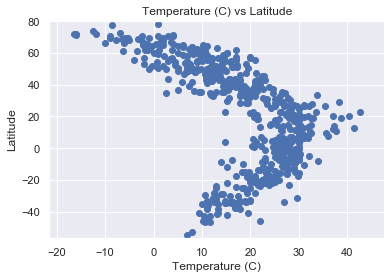

In [11]:
plt.scatter(Cities_DF2["Temperature (C)"], Cities_DF2["Latitude"], marker="o")
plt.title("Temperature (C) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Temperature (C)")
plt.xlim(MinT - 5, MaxT + 5)
plt.ylim(MinL - 2,MaxL + 2)
plt.savefig('TempvsLat.png')
plt.show()

In [ ]:
#After each plot add a sentence or too explaining what the code is and analyzing.
# 1.- This chart show a clear relationship between the hot weather to the equator.
# 2.- As close are you are to the equator the temperature is higher and viceversa.

#### Latitude vs. Humidity Plot

In [12]:
MaxT = Cities_DF2['Humidity (%)'].max()
MinT = Cities_DF2['Humidity (%)'].min()
MaxL = Cities_DF2['Latitude'].max()
MinL = Cities_DF2['Latitude'].min()

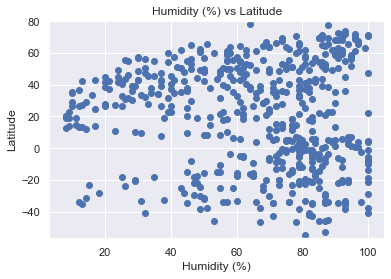

In [13]:
plt.scatter(Cities_DF2["Humidity (%)"], Cities_DF2["Latitude"], marker="o")
plt.title("Humidity (%) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.xlim(MinT - 5, MaxT + 5)
plt.ylim(MinL - 2,MaxL + 2)
plt.savefig('HumsLat.png')
plt.show()

In [ ]:
#After each plot add a sentence or too explaining what the code is and analyzing.
# 1.- The Humidity seems to be higher in a Latitude of 40 to 80.
# 2.- It seems there is no Humidity below latitude -50.
# 3.- Most of the cities has over 60% of Humidity.

#### Latitude vs. Cloudiness Plot

In [14]:
MaxT = Cities_DF2['Cloudiness (%)'].max()
MinT = Cities_DF2['Cloudiness (%)'].min()
MaxL = Cities_DF2['Latitude'].max()
MinL = Cities_DF2['Latitude'].min()

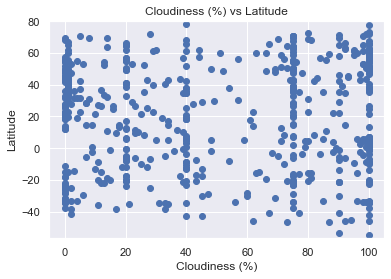

In [15]:
plt.scatter(Cities_DF2["Cloudiness (%)"], Cities_DF2["Latitude"], marker="o")
plt.title("Cloudiness (%) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.xlim(MinT - 5, MaxT + 5)
plt.ylim(MinL - 2,MaxL + 2)
plt.savefig('CloLat.png')
plt.show()

In [ ]:
#After each plot add a sentence or too explaining what the code is and analyzing.
# 1.- The Cloudiness has not a clear relationship with Latitude due there is high Cloudiness from -40% to -80%
# 2.- It seems there is equal Cloudiness arround the world.

#### Latitude vs. Wind Speed Plot

In [16]:
MaxT = Cities_DF2['Wind Speed (mph)'].max()
MinT = Cities_DF2['Wind Speed (mph)'].min()
MaxL = Cities_DF2['Latitude'].max()
MinL = Cities_DF2['Latitude'].min()


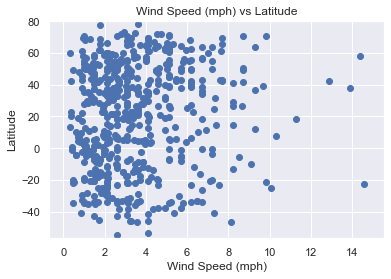

In [17]:
plt.scatter(Cities_DF2["Wind Speed (mph)"], Cities_DF2["Latitude"], marker="o")
plt.title("Wind Speed (mph) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.xlim(MinT - 1, MaxT + 1)
plt.ylim(MinL - 2,MaxL + 2)
plt.savefig('WinLat.png')
plt.show()

In [ ]:
#After each plot add a sentence or too explaining what the code is and analyzing.
# 1.- The Wind Speed has not a clear relationship with Latitude due there is high WindSpeed.
# 2.- It seems there is equal Windspeed arround the world.
# 3.- Only 2% are beyond 10mph windspeed.

## Linear Regression

In [ ]:
# On this second part I decided to use seaborn plots to simplify the code.
# 1.- Its definied the Noth and South Dataframes by filtering the Latitude of Cities_DF2
# 2.- For y and x axis its used the correspondant column of the Cities of the corresponding DF
# 3.- Select color
# 4.- Export the plot

In [ ]:
#Optional create linear regretion function
#slope
#intercept
#r_value
#p_value
#std_err

In [18]:
# Create Northern and Southern Hemisphere DataFrames
Cities_DFNH = Cities_DF2[Cities_DF2['Latitude']>0]
Cities_DFSH = Cities_DF2[Cities_DF2['Latitude']<0]
# Export the DF to .csv
Cities_DFNH.to_csv('CitiesNorthH.csv',index=False)
Cities_DFSH.to_csv('CitiesSouthH.csv',index=False)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

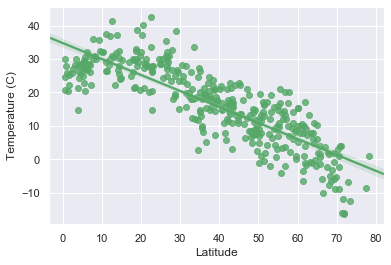

In [19]:
NHML = sns.regplot(y=Cities_DFNH["Temperature (C)"], x=Cities_DFNH["Latitude"], color="g", truncate=False)
plt.savefig('NTemLatLR.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

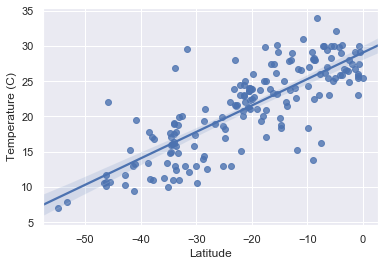

In [20]:
SHML = sns.regplot(y=Cities_DFSH["Temperature (C)"], x=Cities_DFSH["Latitude"], color="b", truncate=False)
plt.savefig('STemLatLR.png')

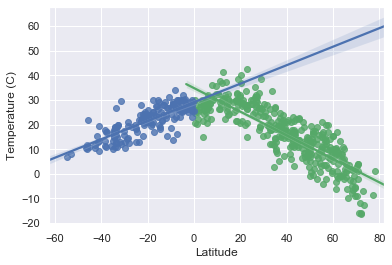

In [21]:
#Optional You will be creating multiple linear regression plots. plots.
NHML = sns.regplot(y=Cities_DFNH["Temperature (C)"], x=Cities_DFNH["Latitude"], color="g", truncate=False)
SHML = sns.regplot(y=Cities_DFSH["Temperature (C)"], x=Cities_DFSH["Latitude"], color="b", truncate=False)
plt.savefig('TemLatMultN&S.png')

In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
# 1.- As explained earlier as close to the Equator higher are the temperatures
# 2.- The majority of the cities selected are hotter.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [42]:
Cities_DFNH["Humidity (%)"] = Cities_DFNH["Humidity (%)"].astype(float)
Cities_DFSH["Humidity (%)"] = Cities_DFSH["Humidity (%)"].astype(float)

/Users/luisjavierbonillamendoza/opt/anaconda3/envs/PyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/luisjavierbonillamendoza/opt/anaconda3/envs/PyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


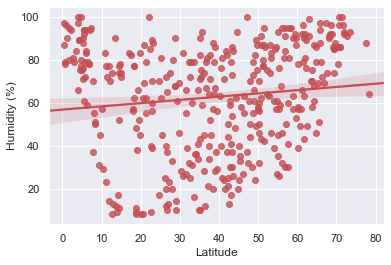

In [22]:
NHHL = sns.regplot(y=Cities_DFNH["Humidity (%)"], x=Cities_DFNH["Latitude"], color="r", truncate=False)
plt.savefig('NHumLatLR.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

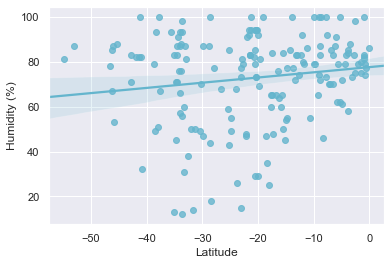

In [23]:
SHHL = sns.regplot(y=Cities_DFSH["Humidity (%)"], x=Cities_DFSH["Latitude"], color="c", truncate=False)
plt.savefig('SHumLatLR.png')

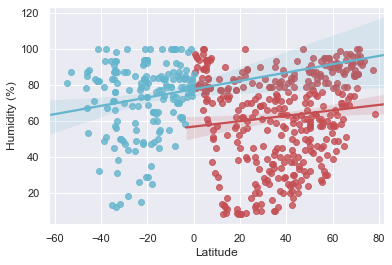

In [24]:
#Optional You will be creating multiple linear regression plots. plots.
NHHL = sns.regplot(y=Cities_DFNH["Humidity (%)"], x=Cities_DFNH["Latitude"], color="r", truncate=False)
SHHL = sns.regplot(y=Cities_DFSH["Humidity (%)"], x=Cities_DFSH["Latitude"], color="c", truncate=False)
plt.savefig('HumLatMultN&S.png')

In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
# 1.- Seems to be more places with low Humidity  in the North
# 2.- There is a bigger sample of the North cities than the south

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [41]:
Cities_DFNH["Cloudiness (%)"] = Cities_DFNH["Cloudiness (%)"].astype(float)
Cities_DFSH["Cloudiness (%)"] = Cities_DFSH["Cloudiness (%)"].astype(float)

/Users/luisjavierbonillamendoza/opt/anaconda3/envs/PyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/luisjavierbonillamendoza/opt/anaconda3/envs/PyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


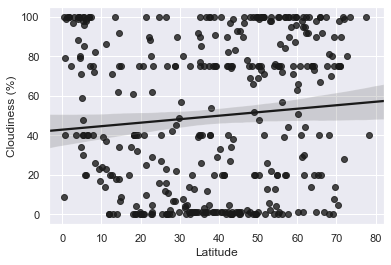

In [25]:
NHHL = sns.regplot(y=Cities_DFNH["Cloudiness (%)"], x=Cities_DFNH["Latitude"], color="k", truncate=False)
plt.savefig('NCloLatLR.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

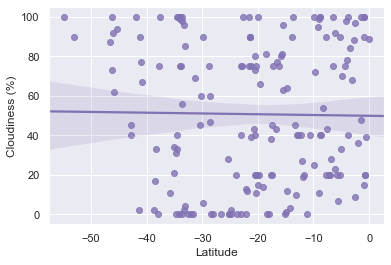

In [26]:
SHHL = sns.regplot(y=Cities_DFSH["Cloudiness (%)"], x=Cities_DFSH["Latitude"], color="m", truncate=False)
plt.savefig('ACloLatLR.png')

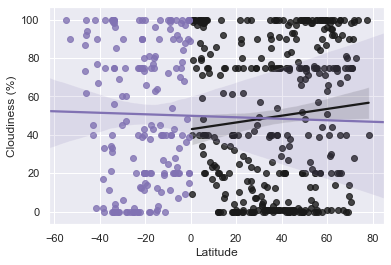

In [27]:
#Optional You will be creating multiple linear regression plots. plots.
NHHL = sns.regplot(y=Cities_DFNH["Cloudiness (%)"], x=Cities_DFNH["Latitude"], color="k", truncate=True)
SHHL = sns.regplot(y=Cities_DFSH["Cloudiness (%)"], x=Cities_DFSH["Latitude"], color="m", truncate=False)
plt.savefig('CloLatMultN&S.png')

In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
# 1.- Below  -40 on Latitude there seems to be low Cloudiness
# 2.- There seems to be more Cloudiness on the Norh but could be for the larger sample obtained.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [40]:
Cities_DFNH["Wind Speed (mph)"] = Cities_DFNH["Wind Speed (mph)"].astype(float)
Cities_DFSH["Wind Speed (mph)"] = Cities_DFSH["Wind Speed (mph)"].astype(float)

/Users/luisjavierbonillamendoza/opt/anaconda3/envs/PyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/luisjavierbonillamendoza/opt/anaconda3/envs/PyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


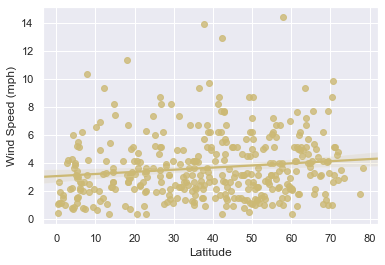

In [39]:
NHWL = sns.regplot(y=Cities_DFNH["Wind Speed (mph)"], x=Cities_DFNH["Latitude"], color="y", truncate=False)
plt.savefig('NWindLatLR.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

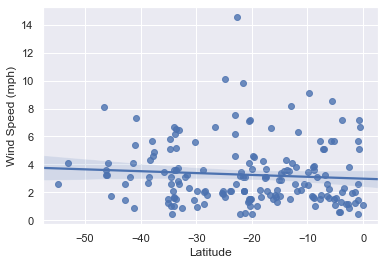

In [43]:
SHHL = sns.regplot(y=Cities_DFSH["Wind Speed (mph)"], x=Cities_DFSH["Latitude"], color="b", truncate=False)
plt.savefig('SWindLatLR.png')

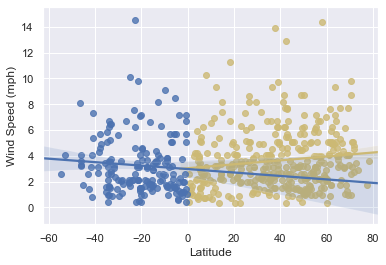

In [44]:
#Optional You will be creating multiple linear regression plots. plots.
NHHL = sns.regplot(y=Cities_DFNH["Wind Speed (mph)"], x=Cities_DFNH["Latitude"], color="y", truncate=False)
SHHL = sns.regplot(y=Cities_DFSH["Wind Speed (mph)"], x=Cities_DFSH["Latitude"], color="b", truncate=False)
plt.savefig('WinLatMultN&S.png')

In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
#  There Latitude does not seems to have a clear relationship with the Windspeed.